In [1]:
import pandas as pd

## Importing data 

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df['Class'].value_counts()[1] / df['Class'].value_counts()[0]

0.0017304750013189597

We have about 0.17% fraud cases. Let's separate the fraud and valid transactions

In [29]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

In [30]:
fraud.shape

(492, 31)

In [31]:
valid.shape

(284315, 31)

Let's look at the distribution of the amount in fraud vs. valid case

In [32]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Let's have a more graphical representation for the distribution of the amount

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

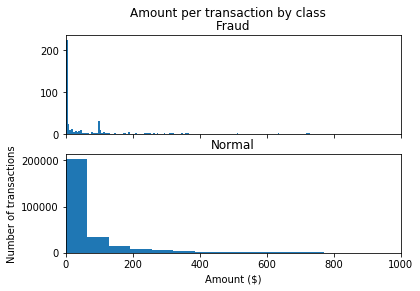

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#sharex=True allows both the subplots to share the same X axis. 
f.suptitle('Amount per transaction by class')

numberBins = 400

ax1.hist(fraud.Amount, bins=numberBins);
ax1.set_title('Fraud')

ax2.hist(valid.Amount, bins=numberBins);
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim((0, 1000));
#plt.yscale('log')

Let's look at te distribution of time for fraud vs. valid transactions. 

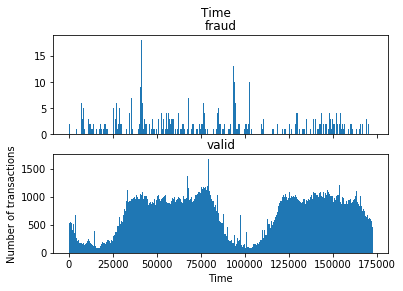

In [74]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

f.suptitle('Time')

ax1.hist(fraud.Time, bins=numberBins)
ax1.set_title('fraud')

ax2.hist(valid.Time, bins=numberBins)
ax2.set_title('valid')

plt.xlabel('Time')
plt.ylabel('Number of transactions');

Let's also look at the time of the transaction vs. amount for fraud and normal cases.

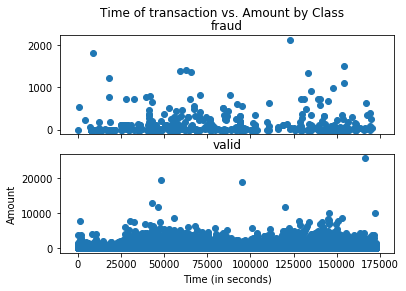

In [77]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs. Amount by Class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')

ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('valid');

plt.xlabel('Time (in seconds)');
plt.ylabel('Amount');

In [79]:
df.Time.head(10)

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64

The time here is the time in seconds from the first transaction. We see (as expected) that it doesn't have any impact on whether the transaction is fraud or not. 

## Preparing the data

We drop the time column and standardize the Amount column.

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
data = df.drop(['Time'], axis = 'columns')

In [82]:
data['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [83]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [84]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [85]:
data['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

In [86]:
data['Amount'].describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

We train the autoencoder only on the valid transactions. 

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
Xtrain, Xtest = train_test_split(data, test_size = 0.2, random_state = 42)

In [109]:
Xtrain.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [110]:
Xtrain = Xtrain[Xtrain.Class == 0]

Xtrain = Xtrain.drop(['Class'], axis = 'columns')

ytest = Xtest['Class']
Xtest = Xtest.drop('Class', axis = 'columns')

In [111]:
Xtrain.shape

(227451, 29)

## Building model

As a first pass, we construct an Autoencoder with 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoding and the last two for the decoding. Additionally, L1 regularization will be used during training

In [121]:
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers

In [126]:
layer1 = 14
layer2 = 7
layer3 = 7

In [141]:
autoencoder = Sequential()

autoencoder.add(Dense(layer1, activation='tanh', activity_regularizer=regularizers.l1(10e-5), \
          input_shape=(Xtrain.shape[1],)))

autoencoder.add(Dense(layer2, activation='relu'))

autoencoder.add(Dense(layer3, activation='tanh'))

autoencoder.add(Dense(Xtrain.shape[1], activation='relu'))

From the documentation: 

#### Example

```python
    # as first layer in a sequential model:
    model = Sequential()
    model.add(Dense(32, input_shape=(16,)))
    # now the model will take as input arrays of shape (*, 16)
    # and output arrays of shape (*, 32)

    # after the first layer, you don't need to specify
    # the size of the input anymore:
    model.add(Dense(32))

In [136]:
Xtrain.shape[1]

29

In [142]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 14)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_16 (Dense)             (None, 29)                232       
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [133]:
Xtrain.shape

(227451, 29)

In [134]:
14 * 30

420

In [138]:
15 * 7

105

In [139]:
8 * 7

56

In [140]:
8 * 29

232

Note how the number of parameters check out. Note that at each step, we have a bias unit added as well. 

Let's train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file. The ModelCheckpoint provided by Keras is really handy for such tasks. Additionally, the training progress will be exported in a format that TensorBoard understands.

In [143]:
numEpoch = 100
batchSize = 32


In [144]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [145]:
from keras.callbacks import ModelCheckpoint, TensorBoard


In [146]:
checkpointer = ModelCheckpoint(filepath="autoencoderModel.h5",
                               verbose=0,
                               save_best_only=True)


In [147]:
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)


In [148]:
history = autoencoder.fit(Xtrain, Xtrain,
                    epochs=numEpoch,
                    batch_size=batchSize,
                    shuffle=True,
                    validation_data=(Xtest, Xtest),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history


Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 11s 46us/step - loss: 0.8346 - acc: 0.5430 - val_loss: 0.7902 - val_acc: 0.6587
Epoch 2/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7481 - acc: 0.6636 - val_loss: 0.7760 - val_acc: 0.6582
Epoch 3/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7384 - acc: 0.6676 - val_loss: 0.7687 - val_acc: 0.6684
Epoch 4/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7345 - acc: 0.6686 - val_loss: 0.7657 - val_acc: 0.6720
Epoch 5/100
227451/227451 [==============================] - 11s 46us/step - loss: 0.7322 - acc: 0.6680 - val_loss: 0.7668 - val_acc: 0.6683
Epoch 6/100
227451/227451 [==============================] - 11s 47us/step - loss: 0.7312 - acc: 0.6676 - val_loss: 0.7658 - val_acc: 0.6736
Epoch 7/100
227451/227451 [==============================] - 11s 47us/step - loss: 0.7302 - acc: 0.6683

227451/227451 [==============================] - 9s 39us/step - loss: 0.7170 - acc: 0.6941 - val_loss: 0.7517 - val_acc: 0.6947
Epoch 59/100
227451/227451 [==============================] - 9s 38us/step - loss: 0.7159 - acc: 0.6951 - val_loss: 0.7506 - val_acc: 0.6979
Epoch 60/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7162 - acc: 0.6950 - val_loss: 0.7505 - val_acc: 0.6944
Epoch 61/100
227451/227451 [==============================] - 9s 39us/step - loss: 0.7158 - acc: 0.6947 - val_loss: 0.7512 - val_acc: 0.7028
Epoch 62/100
227451/227451 [==============================] - 9s 38us/step - loss: 0.7156 - acc: 0.6944 - val_loss: 0.7498 - val_acc: 0.6977
Epoch 63/100
227451/227451 [==============================] - 13s 56us/step - loss: 0.7164 - acc: 0.6941 - val_loss: 0.7505 - val_acc: 0.6899
Epoch 64/100
227451/227451 [==============================] - 9s 38us/step - loss: 0.7166 - acc: 0.6949 - val_loss: 0.7551 - val_acc: 0.6933
Epoch 65/100
227451/2274

## Evaluation

In [152]:
type(history)

dict

In [154]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

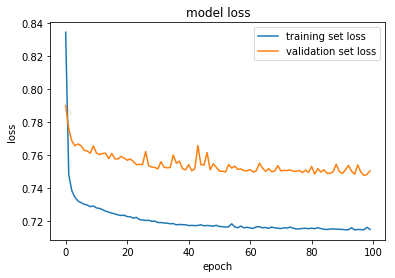

In [161]:
plt.plot(history['loss']);
plt.plot(history['val_loss']);
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set loss', 'validation set loss']);

**Let's now look at the reconstruction error**

In [179]:
predictions = autoencoder.predict(Xtest)

In [180]:
predictions

array([[ 0.        ,  4.09085798,  0.        , ...,  0.88769448,
         0.        ,  0.        ],
       [ 0.8397584 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.48942947],
       [ 1.6279335 ,  0.        ,  0.23472691, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.5557065 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.90350479,  1.75944138, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.48110938]], dtype=float32)

In [181]:
import numpy as np

In [182]:
Xtest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671


In [183]:
np.power(Xtest - predictions, 2).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,273.125419,20.197059,347.817024,90.356308,190.269430,8.022514,288.842975,12.380537,72.370047,199.097305,...,2.294993,3.673228,1.271640,8.363948,0.200784,1.998547,0.214149,8.446404,1.087441,1.216242
49906,0.249946,7.528138,0.017975,1.920246,2.106601,0.073847,0.274973,0.050203,0.300415,0.319238,...,0.256080,0.045555,0.888353,0.277538,1.338630,0.096852,0.557481,0.001681,0.010412,0.056086
29474,0.052141,0.348928,0.004370,1.060798,0.291391,0.001636,0.507751,0.000005,0.944292,0.572747,...,0.045317,0.010485,0.028179,0.027769,0.751101,0.255109,0.053982,0.000130,0.000021,0.052573
276481,0.630560,0.000921,2.786765,0.122153,0.057338,0.397715,0.076724,0.343425,0.234949,1.895160,...,0.059845,0.128832,0.009334,0.031913,0.000295,0.043011,0.024887,0.056352,0.000004,0.120570
278846,0.015495,0.018877,1.031929,0.000022,0.033189,0.915027,0.001870,0.025839,0.131944,0.067315,...,0.065175,0.056951,0.379950,0.089032,0.003790,0.129741,0.030531,0.006091,0.004980,0.122270


In [184]:
np.mean(np.power(Xtest - predictions, 2), axis = 'rows').head()

V1    2.726380
V2    1.830875
V3    1.529412
V4    0.964084
V5    0.959713
dtype: float64

In [185]:
np.mean(np.power(Xtest - predictions, 2), axis = 'columns').head()

43428     80.434173
49906      0.769405
29474      0.250688
276481     0.395672
278846     0.165268
dtype: float64

In [186]:
mse = np.mean(np.power(Xtest - predictions, 2), axis = 'columns')

In [189]:
reconstructionErrorDF = pd.DataFrame({'mse': mse, 'trueClass': ytest})

In [190]:
reconstructionErrorDF.head()

,mse,trueClass
43428,80.434173,1
49906,0.769405,0
29474,0.250688,0
276481,0.395672,0
278846,0.165268,0


In [193]:
validReconstructionErrorDf = reconstructionErrorDF[reconstructionErrorDF['trueClass'] == 0]

In [194]:
fraudReconstructionErrorDF = reconstructionErrorDF[reconstructionErrorDF['trueClass'] == 1]

In [196]:
validReconstructionErrorDf.shape

(56864, 2)

In [197]:
fraudReconstructionErrorDF.shape

(98, 2)

In [198]:
fraudReconstructionErrorDF.mse.describe()

count     98.000000
mean      31.770310
std       47.346760
min        0.187261
25%        4.559711
50%       11.532585
75%       51.610954
max      274.415336
Name: mse, dtype: float64

In [199]:
validReconstructionErrorDf.mse.describe()

count    56864.000000
mean         0.689552
std          2.539457
min          0.043978
25%          0.250279
50%          0.395319
75%          0.629515
max        158.461884
Name: mse, dtype: float64

We see that the reconstruction error is higher for the fraud examples.

In [205]:
import seaborn as sns

In [216]:
sns.set(style='whitegrid', font_scale=1.5)

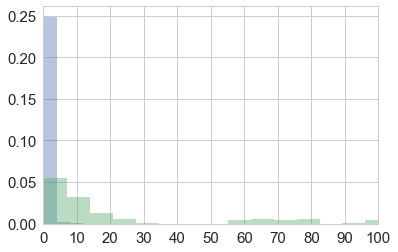

In [229]:
sns.distplot(validReconstructionErrorDf.mse.values, bins = 40, norm_hist=True, kde=False);
sns.distplot(fraudReconstructionErrorDF.mse.values, bins = 40, norm_hist=True, kde=False);
plt.xlim((0, 100));
plt.xticks(np.linspace(0, 100, 11));